# Example of `mixes` usage

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mixes import GMN, SkewGMM, Evaluator
from sklearn import preprocessing

## Dataset loading

The dataset that we will use was collected from eruptions of the Old Faithful geyser in the Yellowstone National Park.
The duration represents the duration of eruption (in minutes) and waiting represents the waiting time till
next eruption. The eruptions could be classified into 2 categories: short and long.

We will lod the dataset and display the first 2 entries:

In [2]:
geyser_df = sns.load_dataset('geyser')
geyser_df.head(2)

,duration,waiting,kind
0,3.6,79,long
1,1.8,54,short


We will show a kernel density plot for the data. For data of larger dimensions,
you can use the [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) function instead.

<AxesSubplot:xlabel='duration', ylabel='waiting'>

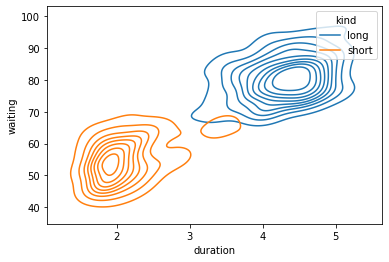

In [7]:
sns.kdeplot(data=geyser_df, x='duration', y='waiting', hue='kind')

We will prepare the data by rescaling it:

In [11]:
data = geyser_df[['duration', 'waiting']].values
labels = geyser_df[['kind']].values.reshape(-1) == 'long'
data = preprocessing.scale(data)

## Model fitting

Create a **GMN** model. The layer sizes represent the sizes of layer of the GMN. First layer size
is the desired number of components (`2` in this case - corresponding to the number of classes in the data).
The next layer sizes represent the number of components of the second layer
 (or equivalently, the subcomponents of the first one). In this case we will create a model
 with `4` components on the second layer.

The dimensions represent the dimensions of variables on each layer. The output dimension of
the first layer will be automatically set to the dimensionality of the data. The first value (`2`) in the
parameter is the input dimension of the first layer, while the second value (`2`) is the input dimension of the second layer.
You would want to set the dimensions in a non-increasing order.


In [25]:
gmn = GMN(layer_sizes=[2, 10], dims=[2, 2])
classes = gmn.fit(data)

## Visualizations

We will visualize the distribution of the model by sampling `200` points from it:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


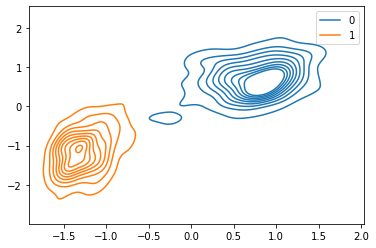

In [26]:
sample, sample_clusters = gmn.random_sample(500)
sns.kdeplot(sample[:, 0], sample[:, 1], hue=sample_clusters);

We will also visualize the distributions for each of the paths.

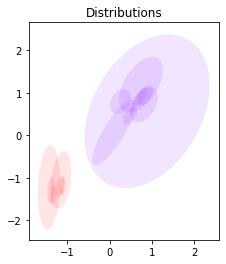

In [28]:
gmn.plot_distributions(data, use_pi=True)

## Evaluator

We can use the evaluator to print metrics during training.
Use the parameters to specify what metrics you want to be shown.


In [13]:
evaluator = Evaluator(labels, 'ARI', 'silhouette')
skew_gmm = SkewGMM(2, evaluator=evaluator)
skew_gmm.fit(data);

Iter   0 (log_lik: -730.49427, ARI: 0.76451, silhouette: 0.66327)
Iter   1 (log_lik: -468.17152, ARI: 0.89906, silhouette: 0.71789)
Iter   2 (log_lik: -446.04112, ARI: 0.92732, silhouette: 0.72802)
Iter   3 (log_lik: -431.19152, ARI: 0.92729, silhouette: 0.73490)
Iter   4 (log_lik: -418.21006, ARI: 0.94160, silhouette: 0.73947)
Iter   5 (log_lik: -407.77070, ARI: 0.92725, silhouette: 0.74123)
Iter   6 (log_lik: -399.69687, ARI: 0.91296, silhouette: 0.74497)
Iter   7 (log_lik: -393.45814, ARI: 0.92717, silhouette: 0.74600)
Iter   8 (log_lik: -389.35478, ARI: 0.92717, silhouette: 0.74600)
Iter   9 (log_lik: -386.97917, ARI: 0.92717, silhouette: 0.74600)
Iter  10 (log_lik: -385.68956, ARI: 0.92717, silhouette: 0.74600)


The supported values are `silhouette`, `ARI` and `accuracy`.

You can use the `Evaluator.add_metric_function` to add additional metrics and `evaluator.get_dataframe`
to get the stored metrics.

